In [25]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import matplotlib
import copy
import astropy.io.fits as _fits
import pandas as pd

import transformations

In [39]:
def get_dataframe_in_adapted_formatting(df):
    
    new_df = df.T.rename(columns=df.T.loc['Keyword'])
    new_df = new_df.drop('Keyword')
    
    return new_df

def add_column_size_after_rescaling(df, experiment, use_random_redshift = False):
    
    if(use_random_redshift):
        z = df['random_redshift']
    else:
        z = df['REDSHIFT']
    
    df['rescale_factor_' + experiment] = transformations.get_down_scale_factor(
        z = z,
        experiment = experiment
    )
    
    df['size_after_rescaling_' + experiment] = df['NAXIS1'].values / df['rescale_factor_' + experiment].values
    
def add_random_redshift(df, zmin = 0.1, zmax = 0.4):
    # Generate a redshift scalar between zmin and zmax
    random_redshifts = np.random.uniform(zmin, zmax, size = df.shape[0])
    
    df['random_redshift'] = random_redshifts

In [27]:
filename = '../../example_data/parameter_stat_72.csv'
chunksize = 1_000
tfr = pd.read_csv(filename, sep = ';', chunksize = chunksize, iterator = True)
df = pd.concat(tfr, ignore_index=False)

In [28]:
df = get_dataframe_in_adapted_formatting(df)

In [29]:
# Select columns with string data type
string_columns = df.select_dtypes(include='object').columns

not_desired_columns = ['SIMPLE', 'EXTEND', 'ORIGIN', 'EXTNAME', 'SIMTAG', 'BUNIT', 'CTYPE1', 'CTYPE2', 'CAMERA', 'COSMO', 'FILTER']
string_columns = [key for key in string_columns if key not in not_desired_columns]
print(string_columns)
# Convert selected columns to float data type
df[string_columns] = df[string_columns].astype(float)

['BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'SNAPNUM', 'SUBHALO', 'INCL', 'AZIM', 'ROLL', 'REDSHIFT', 'NPACKET', 'WLPIVOT', 'FOVSIZE', 'CRPIX1', 'CRVAL1', 'CDELT1', 'CRPIX2', 'CRVAL2', 'CDELT2']


In [30]:
df['REDSHIFT']

shalo_072-299394_v1_photo.fits    0.3999
shalo_072-119154_v1_photo.fits    0.3999
shalo_072-435665_v1_photo.fits    0.3999
shalo_072-501692_v1_photo.fits    0.3999
shalo_072-194862_v3_photo.fits    0.3999
                                   ...  
shalo_072-552253_v3_photo.fits    0.3999
shalo_072-531318_v3_photo.fits    0.3999
shalo_072-542037_v2_photo.fits    0.3999
shalo_072-570727_v3_photo.fits    0.3999
shalo_072-529751_v1_photo.fits    0.3999
Name: REDSHIFT, Length: 11244, dtype: float64

In [31]:
add_column_size_after_rescaling(df, 'HSC')

array([[<AxesSubplot:title={'center':'NAXIS1'}>]], dtype=object)

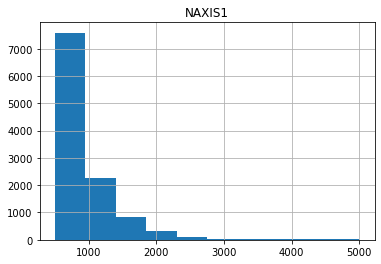

In [32]:
df.hist('NAXIS1')

array([[<AxesSubplot:title={'center':'size_after_rescaling_HSC'}>]],
      dtype=object)

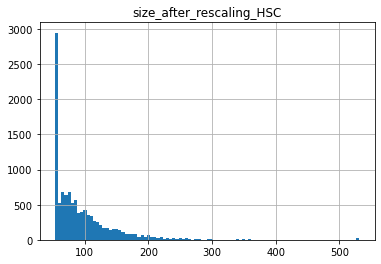

In [33]:
df.hist('size_after_rescaling_HSC', bins = 'auto')

In [34]:
df['size_after_rescaling_HSC'].min()

53.11699733374046

In [35]:
add_random_redshift(df)

In [36]:
df.head()

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,EXTNAME,ORIGIN,SIMTAG,SNAPNUM,...,CRVAL1,CDELT1,CTYPE1,CRPIX2,CRVAL2,CDELT2,CTYPE2,rescale_factor_HSC,size_after_rescaling_HSC,random_redshift
shalo_072-299394_v1_photo.fits,True,-32.0,2.0,1464.0,1464.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,0.0,0.099961,kpc,732.0,0.0,0.099961,kpc,9.413183,155.526568,0.344764
shalo_072-119154_v1_photo.fits,True,-32.0,2.0,657.0,657.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,0.0,0.099879,kpc,328.5,0.0,0.099879,kpc,9.413183,69.795734,0.280382
shalo_072-435665_v1_photo.fits,True,-32.0,2.0,500.0,500.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,0.0,0.100000,kpc,250.0,0.0,0.100000,kpc,9.413183,53.116997,0.136902
shalo_072-501692_v1_photo.fits,True,-32.0,2.0,1012.0,1012.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,0.0,0.099909,kpc,506.0,0.0,0.099909,kpc,9.413183,107.508803,0.163077
shalo_072-194862_v3_photo.fits,True,-32.0,2.0,536.0,536.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,0.0,0.099875,kpc,268.0,0.0,0.099875,kpc,9.413183,56.941421,0.275264


In [40]:
add_column_size_after_rescaling(df, 'HSC', use_random_redshift = True)

array([[<AxesSubplot:title={'center':'size_after_rescaling_HSC'}>]],
      dtype=object)

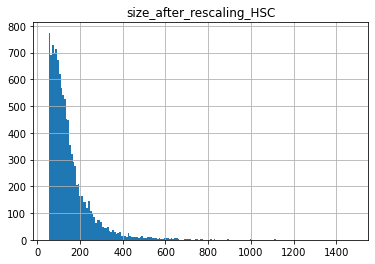

In [41]:
df.hist('size_after_rescaling_HSC', bins = 'auto')